## Uganda Transactions Analysis

In [1]:
# importing packages
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
sns.set_style('darkgrid')
palette = sns.color_palette("mako")

In [2]:
# loading the data
df = pd.read_csv('uganda_stockist_sale_transactions.csv')
df.head(2)

,sale_date,saletransaction_id,product_name,product_id,depot_name,unit_cost,unit_price,region_name,manufacturer_name,category_name,product_type,price_type,depot_county_name,depot_id,quantity
0,2023-02-05 16:42:00 UTC,85560592,salt,561372,MAK TICI,45000.0,60000.0,Northern Region - UG,Tata Chemicals,Minerals and Supplements,50kgs,Retail,Amuru,3216,2
1,2023-02-05 22:55:12 UTC,86322399,Aluminum Phosphate (Zinc Tablets),620039,buluganya 1,4000.0,5000.0,Eastern Region - UG,etg,pesticide,960gm,Retail,Mbale,3296,1


In [3]:
# filtering categories
categories = ['Agrochemicals', 'Equipment', 'Feeds', 'Fertilizers', 'Hygiene', 'Minerals and Supplements', 'Seeds', 'Services', 'Veterinary Products']
df = df[df['category_name'].isin(categories)]
df.reset_index(drop = True)
df['product_name'].unique()

array(['salt', 'passion Fruits', 'Egg Plant Black Beauty', ...,
       'Wormicid 150g Sheep & Goat', 'Sequzene 2.36g', 'V Multinor Bolus'],
      dtype=object)

### **Brand Popularity**

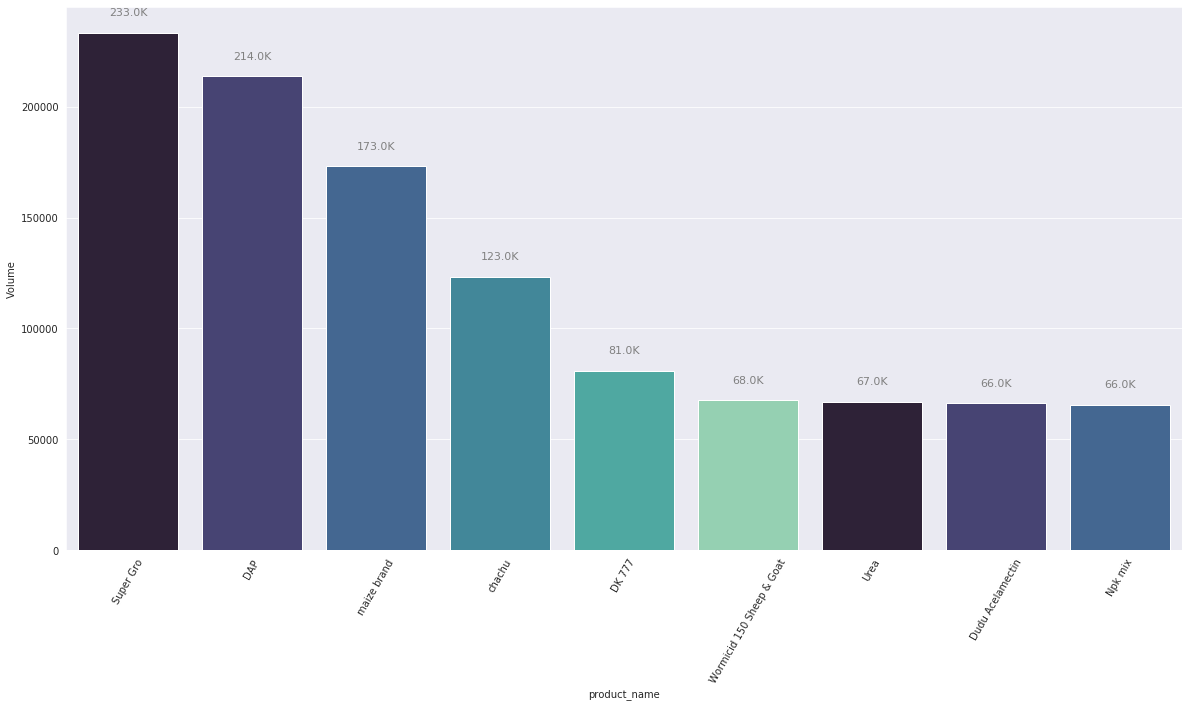

In [4]:
# brand popularity
grouped = df.groupby('product_name').agg({'quantity': 'sum'})
grouped.sort_values(by = 'quantity', ascending=False, inplace = True)
brand_pop_df = grouped[:13]
brand_pop_df.drop(['Super gro', 'maize brand(100kgs)', 'Maize DK777', 'SUPER GRO'], inplace = True)

ax = sns.barplot(x = brand_pop_df.index, y = brand_pop_df['quantity'], palette=palette)
# _=plt.title('Brand popularity', fontweight='bold', fontsize=16, color='black', fontfamily='serif')
plt.ylabel('Volume')
plt.xticks(rotation = 60)
plt.gcf().set_size_inches(20,10)

for p in ax.patches:
    ax.annotate(str(round(p.get_height(), -3)/1000) + "K", (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                textcoords='offset points')

From the volume analysis, the most popular brands in Uganda are:
- Super Gro
- DAP
- maize brand
- chachu
- DK 777
- Wormicid 150 Sheep & Goat	
- Urea
- Dudu Acelamectin
- Npk mix

### **Brands vs. Counties**

In [5]:
# product volume vs. counties
grouped = df.groupby(['depot_county_name', 'product_name']
                     ).agg({'quantity': 'sum'})
group_sum = df.groupby('depot_county_name').agg({'quantity': 'sum'})
group_sum.rename(columns={'quantity': 'total_quantity'}, inplace=True)
group_sum.reset_index(inplace=True)

idx = grouped.groupby('depot_county_name')['quantity'].idxmax()
result = grouped.loc[idx, :].reset_index()

result = result[['depot_county_name', 'product_name', 'quantity']]
result = pd.merge(result, group_sum, on='depot_county_name')
result['proportion %'] = round(
    (result['quantity'] / result['total_quantity']) * 100, 1)

# saving the data to an excel file
writer = pd.ExcelWriter(
    'brand_popularity_per_county.xlsx', engine='xlsxwriter')
result.to_excel(writer, index=False)
writer.save()

# view
brand_df = pd.read_excel('brand_popularity_per_county.xlsx')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
display(brand_df)


,depot_county_name,product_name,quantity,total_quantity,proportion %
0,Abim,African Egg Plant Ngogwe,3,24,12.5
1,Amuria,Wormicid 150 Sheep & Goat,2812,5746,48.9
2,Amuru,Sevin Dudu Dust,196,2166,9.0
3,Apac,Super gro,568,4815,11.8
4,Bugiri,Bazooka,282,787,35.8
5,Bugweri,Urea,10580,21679,48.8
6,Buikwe,B-MO folcrop,17248,22103,78.0
7,Bukedea,DAP,51,426,12.0
8,Bulambuli,Lambdex,353,2237,15.8
9,Bunyangabu,Indofil bag,2207,4667,47.3


- The above table shows the most popular brand per district and the proportion of its sales. For instance, the most popular brand in Abim is African Egg Plant Ngogwe and it accounts for about 14.3% of all sales in the district.
- You can access the data in the 'brand_popularity_per_county' excel file within the repository.

### **Volume per Region**

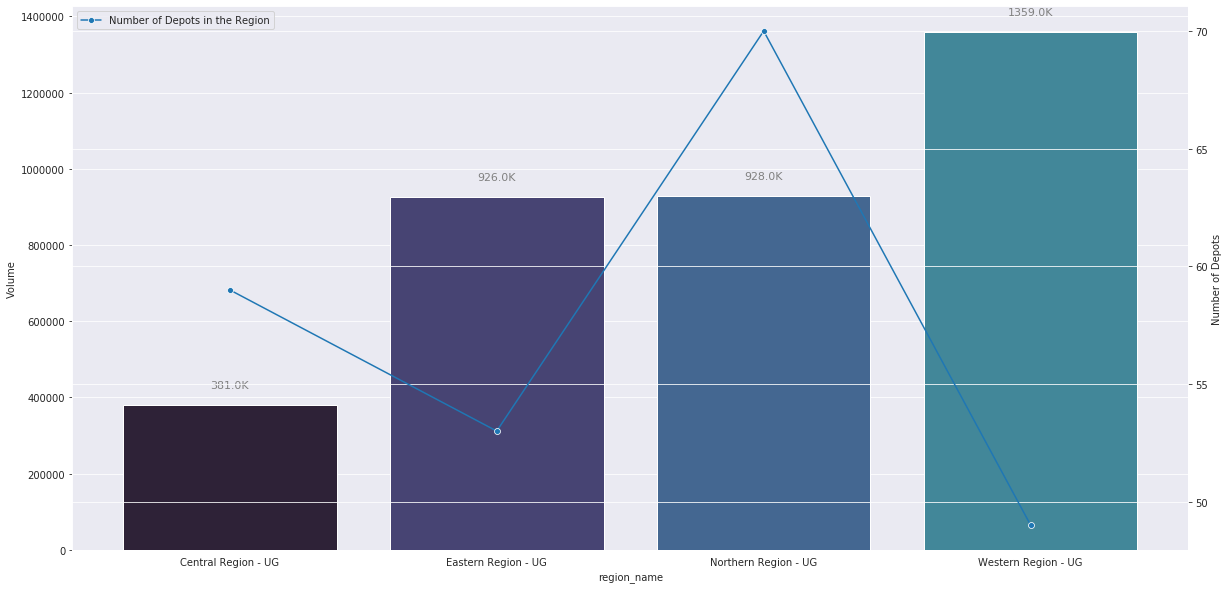

,region_name,quantity
0,Central Region - UG,380791
1,Eastern Region - UG,926247
2,Northern Region - UG,927580
3,Western Region - UG,1358671


,region_name,number_of_depots
0,Central Region - UG,59
1,Eastern Region - UG,53
2,Northern Region - UG,70
3,Western Region - UG,49


In [6]:
# sale volume per region
depot_df = df.groupby('region_name')['depot_id'].nunique().to_frame().reset_index()
depot_df.rename(columns = {'depot_id': 'number_of_depots'}, inplace=True)
grouped_1 = df.groupby('region_name').agg({'quantity': 'sum'})
grouped_1.reset_index(inplace = True)

# Setting up the figure
fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()

# order = ['Central Region - UG', 'Eastern Region - UG', 'Northern Region - UG', 'Western Region - UG']
# Plotting on the ax object
ax1 = sns.barplot(x = 'region_name', y = 'quantity', palette = palette, ax=ax1, data = grouped_1)
ax2 = sns.lineplot(x='region_name', y='number_of_depots', data=depot_df, ax=ax2, sort=False, marker = 'o', label = 'Number of Depots in the Region')
# plt.title('Volume per Region', fontweight='bold', fontsize=14, color='black', fontfamily='serif')
ax1.set_ylabel('Volume')
ax2.set_ylabel('Number of Depots')
plt.gcf().set_size_inches(20, 10)
for p in ax1.patches:
    ax1.annotate(str(round(p.get_height(), -3)/1000) + "K", (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                textcoords='offset points')
plt.legend(loc = 'upper left')
plt.show()

display(grouped_1)
display(depot_df)

- The above figure shows the volume for each region in the past year as well as the number of depots in the region. 
- Northern Region - UG had the most sales with 177799, followed by Western Region - UG with 152140, Eastern Region - UG with 121809, and Central Region - UG with 74494.
- Northern Region - UG has 70 depots, Western Region - UG 49, Eastern Region - UG 53, and Central Region - UG 59.

### **Top Manufacturers**

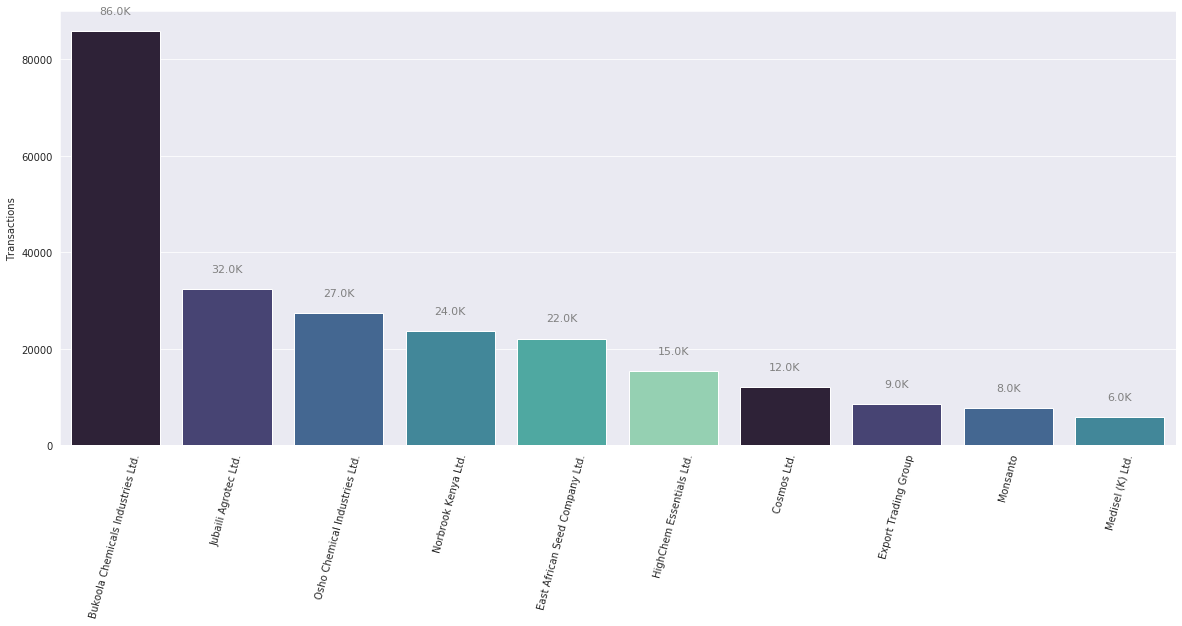

In [7]:
# checking the top manufacturers
manuf = df['manufacturer_name'].value_counts()[:10].to_frame()
ax = sns.barplot(x = manuf.index, y = manuf['manufacturer_name'], palette=palette)
# plt.suptitle('Top 10 manufacturers', fontweight='bold', fontsize=14, color='black', fontfamily='serif')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), -3)/1000) + "K", (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                textcoords='offset points')
plt.ylabel('Transactions')
plt.xticks(rotation=75)
plt.gcf().set_size_inches(20,8)
plt.show()

- The figure above shows the top 10 manufacturers in Uganda.
- Bukoola Chemicals Industries Ltd. is the top manufacturer. Over 80,000 of the transactions in the past year were for products manufactured by the company.

### **Manufacturers vs. Products**

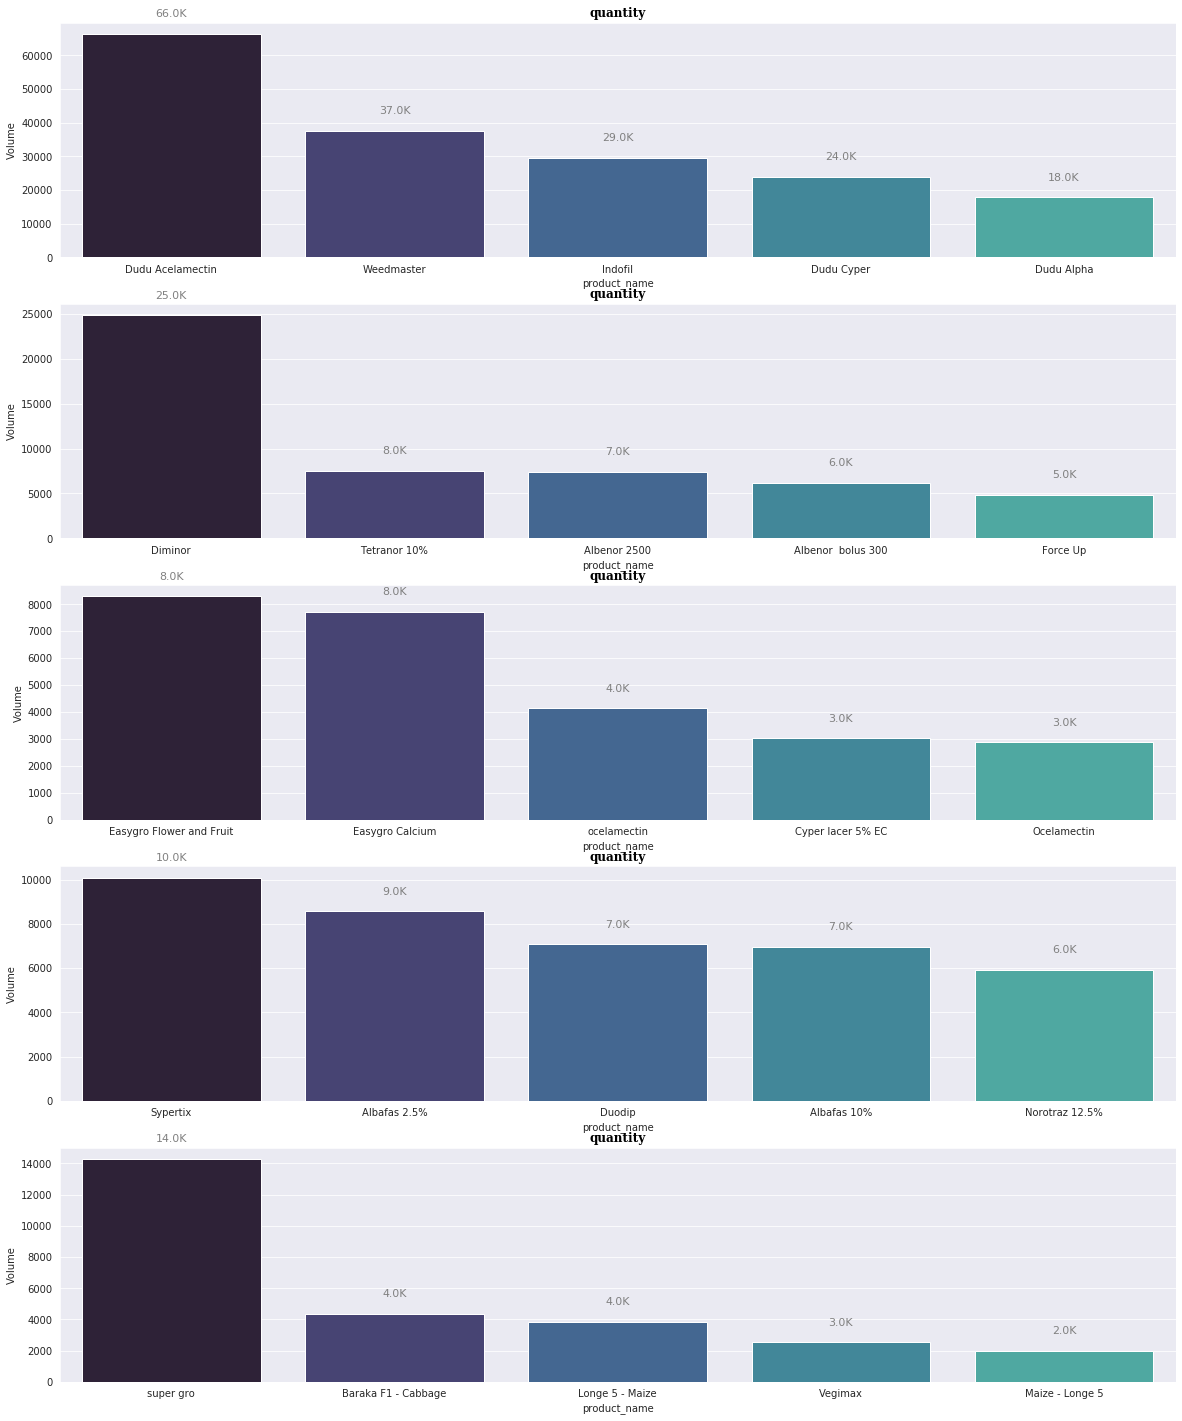

In [8]:
# creating dataframes to be visualized
Bukoola = df[df['manufacturer_name'] == 'Bukoola Chemicals Industries Ltd.']
Bukoola = Bukoola.groupby('product_name').agg({'quantity': 'sum'}).sort_values(by = 'quantity', ascending = False)[:5]
Bukoola.rename(columns = {'product_name': 'Bukoola Chemicals Industries Ltd.'}, inplace=True)

Jubaili = df[df['manufacturer_name'] == 'Jubaili Agrotec Ltd.']
Jubaili = Jubaili.groupby('product_name').agg({'quantity': 'sum'}).sort_values(by = 'quantity', ascending = False)[:5]
Jubaili.rename(columns = {'product_name': 'Jubaili Agrotec Ltd.'}, inplace=True)

Osho = df[df['manufacturer_name'] == 'Osho Chemical Industries Ltd.']
Osho = Osho.groupby('product_name').agg({'quantity': 'sum'}).sort_values(by = 'quantity', ascending = False)[:5]
Osho.rename(columns = {'product_name': 'Osho Chemical Industries Ltd.'}, inplace=True)

Norbrook = df[df['manufacturer_name'] == 'Norbrook Kenya Ltd.']
Norbrook = Norbrook.groupby('product_name').agg({'quantity': 'sum'}).sort_values(by = 'quantity', ascending = False)[:5]
Norbrook.rename(columns = {'product_name': 'Norbrook Kenya Ltd.'}, inplace=True)

EASC = df[df['manufacturer_name'] == 'East African Seed Company Ltd.']
EASC = EASC.groupby('product_name').agg({'quantity': 'sum'}).sort_values(by = 'quantity', ascending = False)[:5]
EASC.rename(columns = {'product_name': 'East African Seed Company Ltd.'}, inplace=True)

# generating the figure and axes
fig, axs = plt.subplots(5, 1, figsize = (20,25))
# fig.suptitle('Manufacturers vs. Products', fontweight='bold', fontsize=18, color='black', fontfamily='serif', y=0.91)
axs = axs.ravel()

# creating the list of dfs to be plotted
list_dfs = [Bukoola, Jubaili, Osho, Norbrook, EASC]

# plotting the data
for n, data in enumerate(list_dfs):
    sns.barplot(x = data.index, y = data.iloc[:,0], palette= palette, ax = axs[n])
    for p in axs[n].patches:
        axs[n].annotate(str(round(p.get_height(), -3)/1000) + "K", (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height()),
                    ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                    textcoords='offset points')
    axs[n].set_title(data.columns[0], fontweight='bold', fontsize=12, color='black', fontfamily='serif')
    axs[n].set_ylabel('Volume')

- The above figure shows the top 5 manufacturers and their most popular products.
- For Bukoola Chemicals Industries Ltd., the most popular products are Dudu Acelamectin, Weedmaster, Indofil, Dudu Cyper, and Striker.

### **Regions vs. Manufacturers**

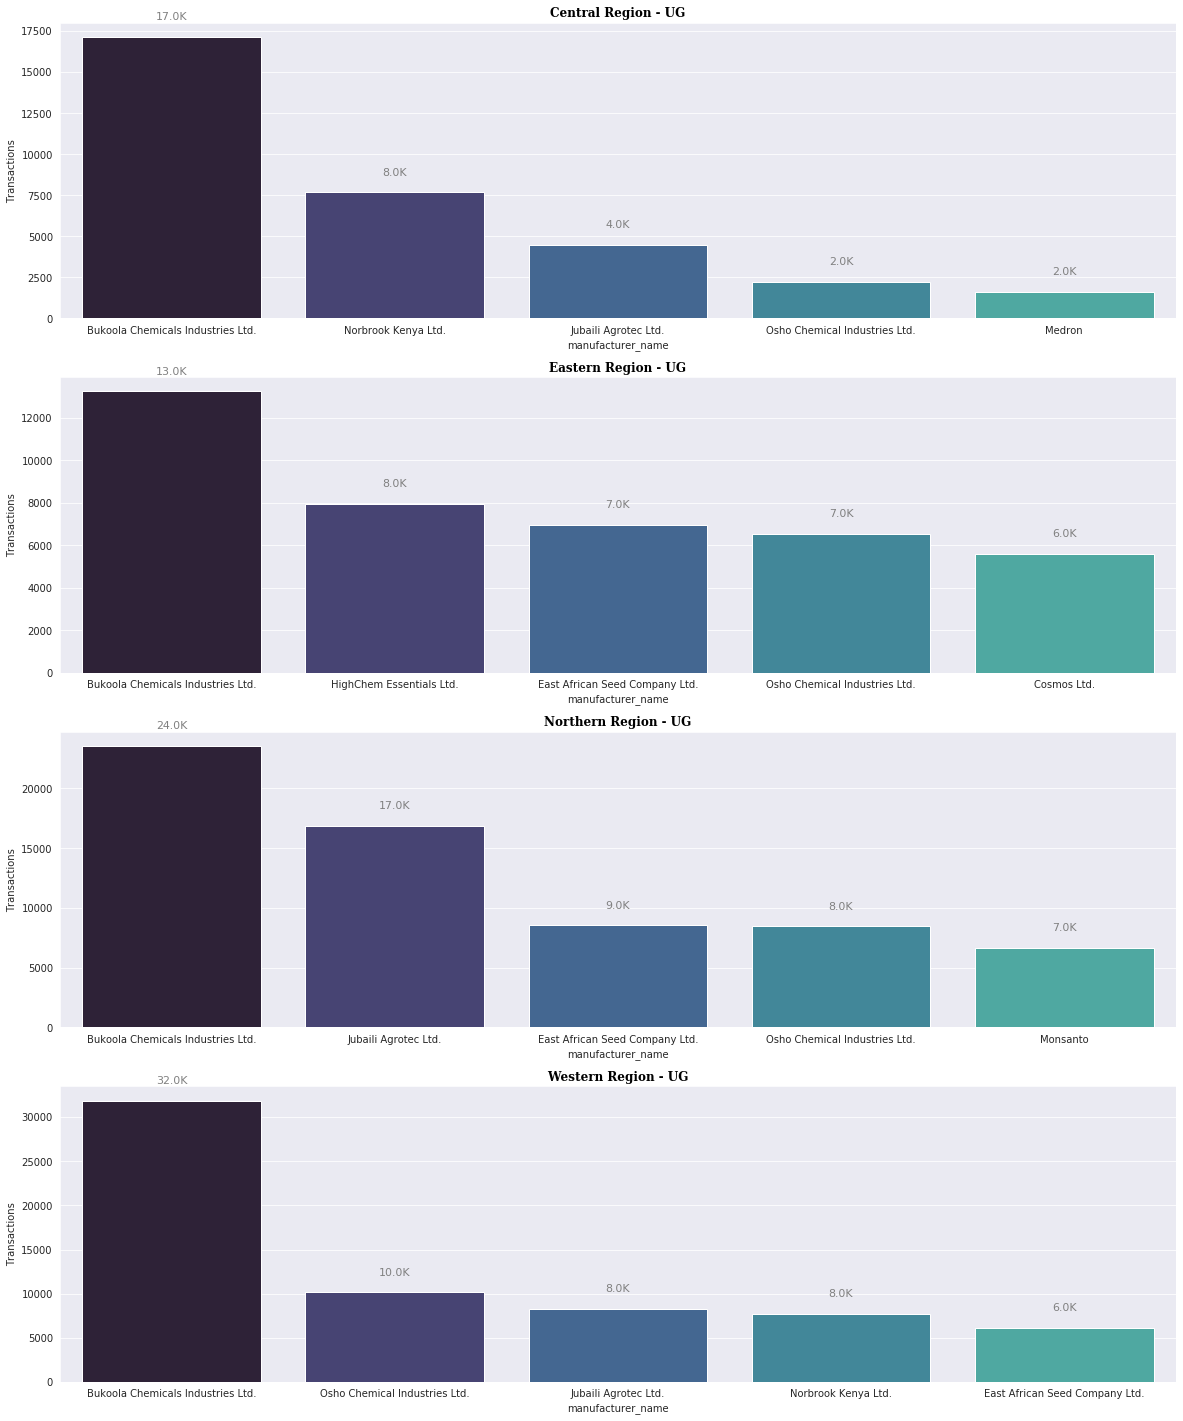

In [9]:
# regions vs. manufacturers
_=df.groupby('region_name')['manufacturer_name'].value_counts()
most_common_manuf = _.groupby('region_name').head()
manuf_by_region = pd.DataFrame(most_common_manuf)
manuf_by_region.rename(columns = {'manufacturer_name': 'count'}, inplace=True)
manuf_by_region.reset_index(inplace = True)

# generating the figure and axes
fig, axs = plt.subplots(4, 1, figsize = (20,25))
# fig.subplots_adjust(hspace = .5, wspace=.1)
# fig.suptitle('Regions vs Manufacturers', fontweight='bold', fontsize=18, color='black', fontfamily='serif', y=0.91)
axs = axs.ravel()   
regions = ['Central Region - UG', 'Eastern Region - UG', 'Northern Region - UG', 'Western Region - UG']
for n, region in enumerate(regions):
    data = manuf_by_region[manuf_by_region['region_name'] == region]
    sns.barplot(x = data['manufacturer_name'], y = data['count'], palette= palette, ax = axs[n])
    for p in axs[n].patches:
        axs[n].annotate(str(round(p.get_height(), -3)/1000) + "K", (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height()),
                    ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                    textcoords='offset points')
    axs[n].set_title(region, fontweight='bold', fontsize=12, color='black', fontfamily='serif')
    axs[n].set_ylabel('Transactions')

- The above figure shows the top manufacturers in each region.
- Bukoola Chemicals Industries Ltd. is the top manufacturer in all regions.

### **Regions vs. Categories**

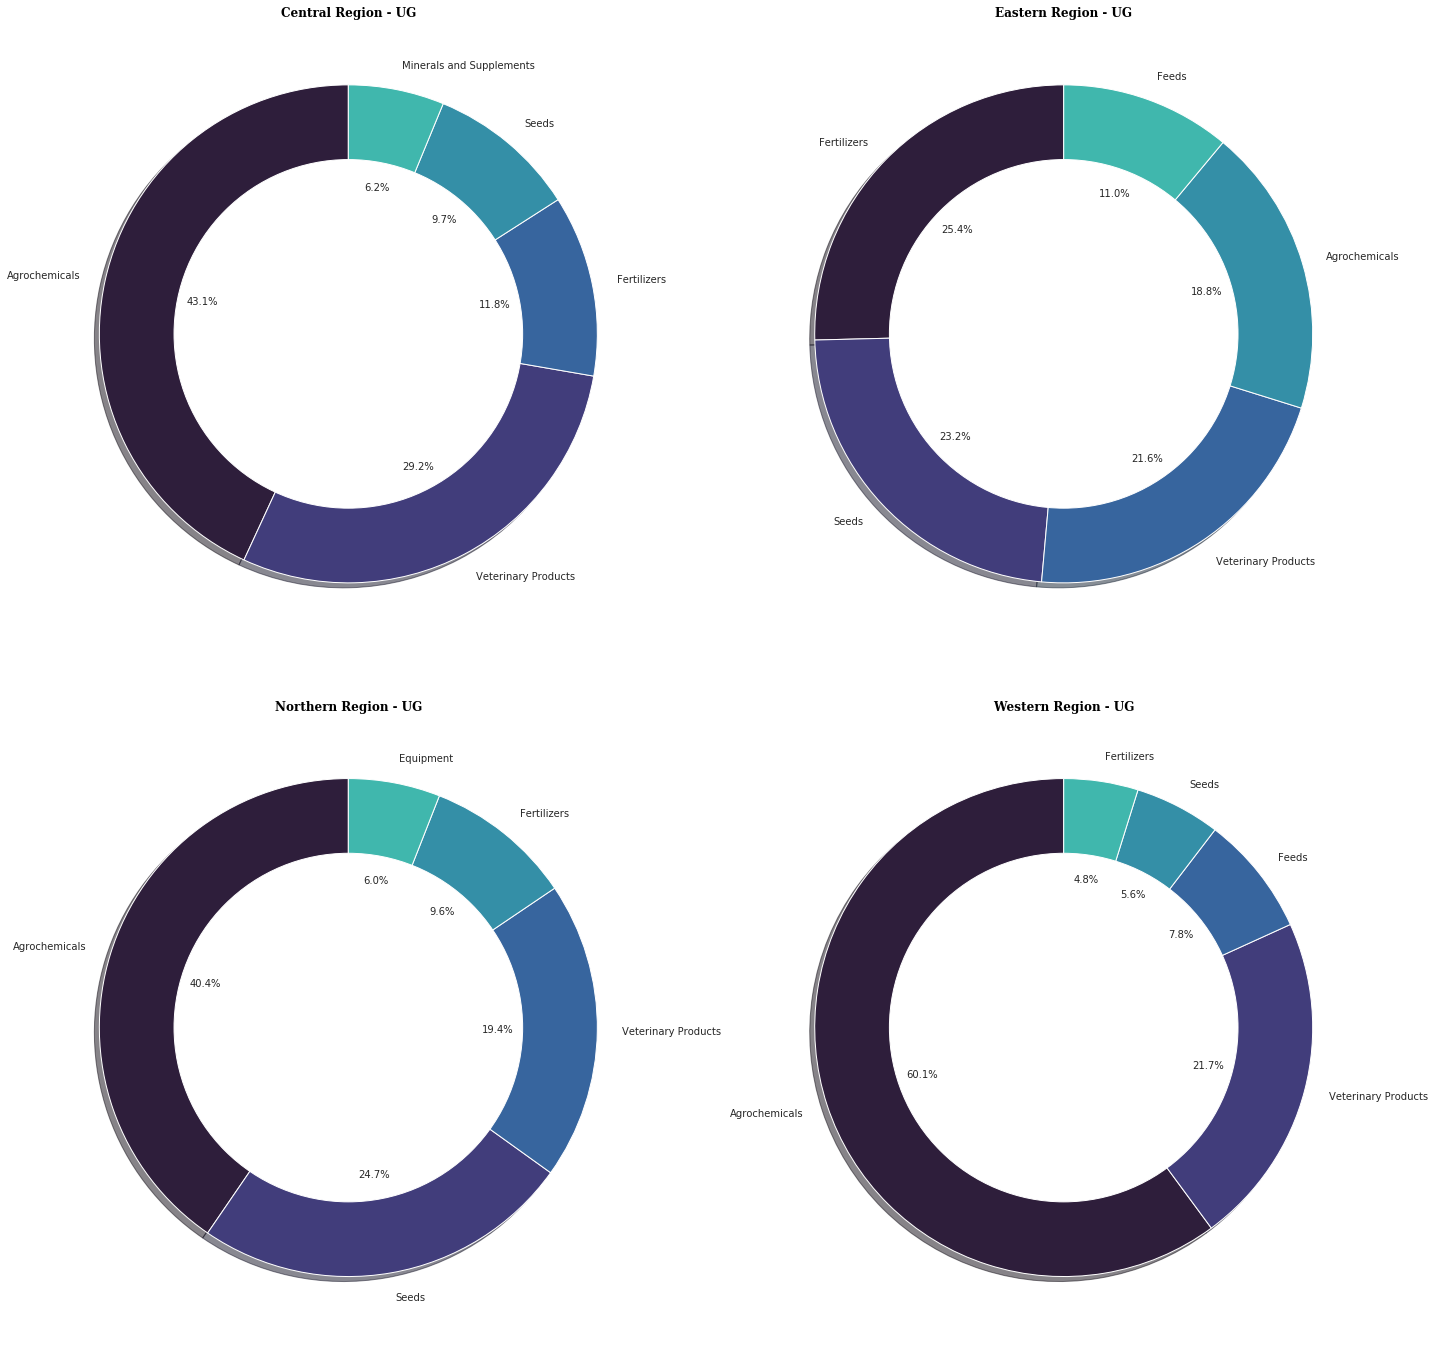

In [10]:
# regions vs. product categories
_=df.groupby('region_name')['category_name'].value_counts()
most_common_categ = _.groupby('region_name').head()
categ_by_region = pd.DataFrame(most_common_categ)
categ_by_region.rename(columns = {'category_name': 'count'}, inplace=True)
categ_by_region.reset_index(inplace = True)
categ_by_region

# generating the figure and axes
fig, axs = plt.subplots(2, 2, figsize = (20,20))
fig.subplots_adjust(hspace = .5, wspace=.1)
# fig.suptitle('Regions vs Product Categories', fontweight='bold', fontsize=18, color='black', fontfamily='serif', y=0.99)
axs = axs.ravel()   
regions = ['Central Region - UG', 'Eastern Region - UG', 'Northern Region - UG', 'Western Region - UG']

def donut_plot(df, col, title, ax, color = sns.color_palette("mako"), labels = None):
    data = df[col].value_counts()
    data = df[df[col] == region]
    if labels is None:
        labels = data['category_name']
    ax.pie(data['count'], colors = color, autopct = '%1.1f%%', shadow = True, startangle = 90, labels = labels)
    circle = plt.Circle((0,0), 0.7, color = 'white')
    ax.add_artist(circle)
    ax.set_title(title, fontweight='bold', fontsize=12, color='black', fontfamily='serif')
    plt.tight_layout()

for n, region in enumerate(regions):
    title = region
    donut_plot(categ_by_region, 'region_name', title = title, ax = axs[n])

- The above figure shows the most common categories per region and the proportion percentage of each.
- The values vary from region to region, however, agrocemicals seem to be a constant.

### **Brands vs. Regions**

In [11]:
# top brands in each region
def count_tables(df):
    totals = df.groupby('product_name')['quantity'].agg('sum')
    top_products = totals.sort_values(ascending=False).head(5)
    top_products = list(top_products.index)
    product_details = []
    for product in top_products:
        details = {}
        details['product'] = product
        details['total_quantity'] = df.loc[df['product_name'] == product, 'quantity'].sum()
        details['category'] = df.loc[df['product_name'] == product, 'category_name'].iloc[0]
        details['manufacturer'] = df.loc[df['product_name'] == product, 'manufacturer_name'].iloc[0]
        product_details.append(details)
        region = df.loc[df['product_name'] == product, 'region_name'].iloc[0]

    new_df = pd.DataFrame(product_details)
    new_df['proportion %'] = round((new_df['total_quantity'] / df['quantity'].sum()) * 100, 1)
    new_df.drop('total_quantity', axis =1, inplace = True)

    print('\033[1m' + f'Top brands in {region}' + '\033[0m')
    display(new_df)
    print('\n')

central = df[df['region_name'] == 'Central Region - UG']
eastern = df[df['region_name'] == 'Eastern Region - UG']
northern = df[df['region_name'] == 'Northern Region - UG']
western = df[df['region_name'] == 'Western Region - UG']

regions = [central, eastern, northern, western]

# calling the function
for i, n in enumerate(regions):
    count_tables(n)

Top brands in Central Region - UG


,product,category,manufacturer,proportion %
0,Super gro,Agrochemicals,Neolife,18.7
1,Dudu Acelamectin,Agrochemicals,Bukoola Chemicals Industries Ltd.,8.8
2,B-MO folcrop,Fertilizers,Faith Agro,4.5
3,DKC90-89,Seeds,monsanto kenya ltd,2.8
4,Java Ikg,Fertilizers,kaam farmer's service,1.7




Top brands in Eastern Region - UG


,product,category,manufacturer,proportion %
0,DAP,Fertilizers,Export Trading Group,19.5
1,Npk mix,Fertilizers,Elgon Kenya Ltd.,7.1
2,Wormicid 150 Sheep & Goat,Veterinary Products,Cosmos Ltd.,7.0
3,Urea,Fertilizers,Elgon Kenya Ltd.,6.4
4,Brown Bran,Feeds,M10,5.4




Top brands in Northern Region - UG


,product,category,manufacturer,proportion %
0,DK 777,Seeds,DEKALD,8.7
1,Maize DK777,Seeds,Dekalp,6.7
2,Wormicid 150g Sheep & Goat,Veterinary Products,Cosmos Ltd.,4.3
3,Bazooka maize,Seeds,NASECO,3.2
4,Maize Dk 777,Agrochemicals,faith agro,2.9




Top brands in Western Region - UG


,product,category,manufacturer,proportion %
0,Super Gro,Fertilizers,NeoLife international(Pty) Ltd,17.0
1,maize brand,Feeds,Paul,12.7
2,chachu,Feeds,different,9.1
3,maize brand(100kgs),Feeds,kamya,9.0
4,SUPER GRO,Agrochemicals,Neo life international ltd,3.8


- The above tables show the most popular brands in each region, their categories, manufacturers, and proportion of sales.